# ***STEP-1: IMPORTING THE DATASET***

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('/content/drive/MyDrive/MP-1/Loan Eligible Dataset')

In [2]:
train = pd.read_csv('./loan-train.csv')
train.Loan_Status = train.Loan_Status.map({'Y':1,'N':0})

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


#***STEP-2: PRE-PROCESSING OF DATA***

In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
Loan_status = train.Loan_Status
train.drop('Loan_Status',axis = 1,inplace = True)
test = pd.read_csv('./loan-test.csv')
Loan_ID = test.Loan_ID
data = train.append(test)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [6]:
print("Training data:",len(train.index))
print("Testing data:",len(test.index))
print("Total data:",len(data.index))
print("No. of columns and rows:",data.shape)

Training data: 614
Testing data: 367
Total data: 981
No. of columns and rows: (981, 12)


#***STEP-3: LABEL ENCODING***

In [7]:
#Label encoding for gender
data.Gender = data.Gender.map({'Male':1,'Female':0})
data.Gender.value_counts()

1.0    775
0.0    182
Name: Gender, dtype: int64

In [8]:
#Label encoding for martial status
data.Married = data.Married.map({'Yes':1,'No':0})
data.Married.value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [9]:
#Label encoding for Dependents
data.Dependents = data.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
data.Dependents.value_counts()

0.0    545
2.0    160
1.0    160
3.0     91
Name: Dependents, dtype: int64

In [10]:
#Label encoding for Education Status
data.Education = data.Education.map({'Graduate':1,'Not Graduate':0})
data.Education.value_counts()

1    763
0    218
Name: Education, dtype: int64

In [11]:
#Label encoding for Employment Status
data.Self_Employed = data.Self_Employed.map({'Yes':1,'No':0})
data.Self_Employed.value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

In [12]:
#Label encoding for Property Area
data.Property_Area = data.Property_Area.map({'Rural':0,'Semiurban':1,'Urban':2})
data.Property_Area.value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

In [13]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


#***STEP-4: FILLING THE MISSING VALUES***

In [14]:
print("Before filling:\n",data.isnull().sum())
data.Dependents.fillna(data.Dependents.median(),inplace = True)
data.Credit_History.fillna(np.random.randint(0,2),inplace = True)
data.Married.fillna(np.random.randint(0,2),inplace = True)
data.LoanAmount.fillna(data.LoanAmount.median(),inplace = True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace = True)
data.Self_Employed.fillna(np.random.randint(0,2),inplace = True)
data.Gender.fillna(np.random.randint(0,2),inplace = True)
print("After filling:\n",data.isnull().sum())

Before filling:
 Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64
After filling:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


#***STEP-5: DROPPING THE UNWANTED VALUES***

In [15]:
data.drop('Loan_ID', inplace = True, axis = 1)

In [16]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,1,0.0,5849,0.0,126.0,360.0,1.0,2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2


#***STEP-6: SPLITTING THE DATA***

In [17]:
x = data.iloc[:614,]
y = Loan_status

In [42]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)

In [36]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(460, 11)
(154, 11)
(460,)
(154,)


In [43]:
test_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
454,1.0,0.0,0.0,1,1.0,7085,0.0,84.0,360.0,1.0,1
52,0.0,0.0,0.0,1,0.0,4230,0.0,112.0,360.0,1.0,1
536,1.0,1.0,0.0,1,0.0,6133,3906.0,324.0,360.0,1.0,2
469,1.0,1.0,0.0,1,0.0,4333,2451.0,110.0,360.0,1.0,2
55,1.0,1.0,2.0,1,0.0,2708,1167.0,97.0,360.0,1.0,1


#***STEP-7: TRAINING AND TESTING THE MODEL***

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_x,train_y)

In [22]:
model.score(test_x,test_y)

0.8311688311688312

In [23]:
pred_y = model.predict(test_x)
print('Predicted data:',pred_y)
print('Testing data:',test_y)

Predicted data: [1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0]
Testing data: 454    1
52     0
536    1
469    0
55     1
      ..
399    0
89     1
271    1
563    1
162    0
Name: Loan_Status, Length: 154, dtype: int64


#***STEP-8: DEMONSTRATION OF CONFUSION MATRIX***

In [24]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_y,pred_y)
matrix

array([[ 20,  23],
       [  3, 108]])

Text(69.0, 0.5, 'Truth')

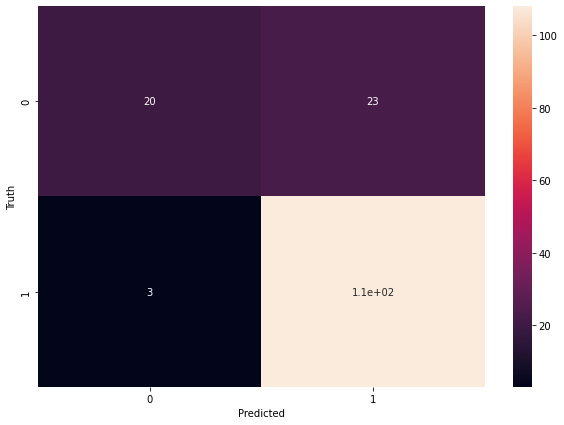

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(matrix,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#***STEP-9: SAVING THE MODEL***

In [26]:
import pickle
file = '/content/drive/MyDrive/MP-1/Model/ML_Model.pkl'
with open(file, 'wb') as f:
    pickle.dump(model, f)

#***STEP-10: EVALUATION OF THE MODEL***

In [27]:
with open(file, 'rb') as f:
    model = pickle.load(f)

In [28]:
#A sample from the dataset is taken to evaluate the model
decision = model.predict([[0.0,	0.0,	0.0,	1,	0.0,	1811,	1666.0,	54.0,	360.0,	1.0,	2]])
print(decision)  #true or false

[1]


In [29]:
#To deploy
import sklearn
import skimage
import pickle
print(sklearn.__version__)
print(skimage.__version__)
print(pickle.format_version)

0.22.2.post1
0.16.2
4.0
